# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

# Findings
Based off our graphs it seems that latidute has a strong correlation to the maximum temperature for the Northern and Southern hemispheres. For both the Northern and Southern hemisphere the temperature rises as the latitude gets closer to the equator. We can conclude that warmer temperatures are near the equator. Latitude didn't have a strong correlation to humidity, cloudiness or windspeed. I think it would be interesting to investigate these three aspects to see if there is any correlation between them. I noticed that between the Northern and Southern hemisphere graphs for wind speed vs latitude they looked similar. I calculated the mean, median, sem, var and standard deviation of each hemispheres wind speed and found that the values were similar. I think this strengthens the observation that there is not correlation between latitude and wind speed.  

In [1]:
#pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

606


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "metric"
qurl = f"{url}appid={weather_api_key}&units={units}&q="

cities_data = {"City": [],
              "Lats": [],
              "Lngs": [],
              "Max Temp": [],
              "Humidity": [],
              "Cloudiness": [],
              "Wind Speed": [],
              "Country": [],
              "Date": []}
print("Starting Retrieval...")
for i,city in enumerate(cities):
    response = requests.get(qurl + city)
    
    #checks to see if our city in cities is a valid input for our response
    #we could also use a try + except here instead of this if statement, logically these are equivalent
    if response.status_code == 200:
        response = response.json()
    
        print("Processing record:", str(i), city)
        cities_data["City"].append(response["name"])
        cities_data["Lats"].append(response["coord"]["lat"])
        cities_data["Lngs"].append(response["coord"]["lon"])
        cities_data["Max Temp"].append(response["main"]["temp_max"])
        cities_data["Humidity"].append(response["main"]["humidity"])
        cities_data["Cloudiness"].append(response["clouds"]["all"])
        cities_data["Wind Speed"].append(response["wind"]["speed"])
        cities_data["Country"].append(response["sys"]["country"])
        cities_data["Date"].append(response["dt"])
 
print("data retrieval completed")

Starting Retrieval...
Processing record: 1 nikolskoye
Processing record: 2 busselton
Processing record: 3 mataura
Processing record: 4 olafsvik
Processing record: 5 rikitea
Processing record: 6 pombas
Processing record: 7 vilanova del cami
Processing record: 8 shakawe
Processing record: 9 port alfred
Processing record: 10 saquena
Processing record: 11 hithadhoo
Processing record: 12 bluff
Processing record: 13 inuvik
Processing record: 14 vao
Processing record: 15 port elizabeth
Processing record: 16 albany
Processing record: 17 vaini
Processing record: 18 cidreira
Processing record: 19 ola
Processing record: 20 chuy
Processing record: 21 college
Processing record: 22 leningradskiy
Processing record: 23 butaritari
Processing record: 24 chiguayante
Processing record: 25 bethel
Processing record: 26 ushuaia
Processing record: 27 coihueco
Processing record: 29 bodden town
Processing record: 30 trincomalee
Processing record: 31 fairbanks
Processing record: 32 puerto ayora
Processing record

Processing record: 283 carbonia
Processing record: 284 mirabad
Processing record: 285 gemena
Processing record: 286 kensington
Processing record: 287 lukovetskiy
Processing record: 288 lasa
Processing record: 289 fortuna
Processing record: 290 vryburg
Processing record: 291 presidencia roque saenz pena
Processing record: 292 beyneu
Processing record: 293 harrison
Processing record: 294 kirakira
Processing record: 295 nizip
Processing record: 296 san quintin
Processing record: 297 nelson bay
Processing record: 299 cienfuegos
Processing record: 300 mayo
Processing record: 301 araouane
Processing record: 302 srednekolymsk
Processing record: 304 raudeberg
Processing record: 305 anito
Processing record: 306 tucurui
Processing record: 307 broken hill
Processing record: 308 dikson
Processing record: 309 antalaha
Processing record: 310 kirs
Processing record: 311 pahrump
Processing record: 312 lancaster
Processing record: 313 ancud
Processing record: 314 mehamn
Processing record: 315 jardim
Pr

Processing record: 557 hay river
Processing record: 558 adrar
Processing record: 559 santa quiteria
Processing record: 560 jaysingpur
Processing record: 562 booue
Processing record: 563 guarapari
Processing record: 564 njombe
Processing record: 565 dunedin
Processing record: 566 samarai
Processing record: 567 lodwar
Processing record: 568 kaka
Processing record: 569 eyl
Processing record: 570 zhigansk
Processing record: 571 mitu
Processing record: 572 tawau
Processing record: 573 walvis bay
Processing record: 574 pozo colorado
Processing record: 575 milas
Processing record: 576 port hawkesbury
Processing record: 577 catabola
Processing record: 580 balclutha
Processing record: 581 erenhot
Processing record: 582 sola
Processing record: 583 hastings
Processing record: 584 viedma
Processing record: 585 adelaide
Processing record: 586 alta floresta
Processing record: 587 aksay
Processing record: 588 darlowo
Processing record: 589 los llanos de aridane
Processing record: 590 carballo
Process

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
cities_data = pd.DataFrame(cities_data)

cities_data.head()

,City,Lats,Lngs,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Nikolskoye,59.7035,30.7861,18.77,82,49,1.17,RU,1659555815
1,Busselton,-33.6500,115.3333,11.89,73,95,8.35,AU,1659555816
2,Mataura,-46.1927,168.8643,6.93,87,100,1.84,NZ,1659555816
3,Olafsvik,64.8945,-23.7142,10.02,65,15,5.07,IS,1659555601
4,Rikitea,-23.1203,-134.9692,22.29,68,71,7.16,PF,1659555817


In [7]:
#puts our data into a csv file
cities_data.to_csv('output_data/cities.csv')

In [8]:
#dropping the columns that dont have numerical data so we can use the aggregate function
ints_only = cities_data.drop(columns = ["City", "Country"])

ints_only.agg({"count", "mean", "median", "var", "std", "sem", "min", "max"})

,Lats,Lngs,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,5.580000e+02
median,27.170350,19.374650,21.645000,77.000000,70.000000,3.090000,1.659556e+09
min,-54.800000,-175.200000,1.930000,1.000000,0.000000,0.000000,1.659555e+09
sem,1.448551,3.852543,0.333511,0.884097,1.696164,0.107130,4.523375e+00
max,78.218600,179.316700,39.980000,100.000000,100.000000,14.740000,1.659556e+09
var,1170.851505,8281.882720,62.066093,436.147784,1605.349961,6.404098,1.141719e+04
std,34.217707,91.004850,7.878204,20.884151,40.066819,2.530632,1.068513e+02
mean,20.105501,19.966494,21.260108,71.802867,55.939068,3.615968,1.659556e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
#skipping this step because by our summary table the maximum humidity value is 100
#so therefore there is no city with a humidity value greater than 100
#i have written some code to show the process of removing cities with >100% humidity

In [10]:
#  Get the indices of cities that have humidity over 100%.

#over100 = cities_data.loc[cities_data["Humidity"] > 100]
#over100

In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
# city_data = city_data.loc[cities_data["Humidity"] <= 100]

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

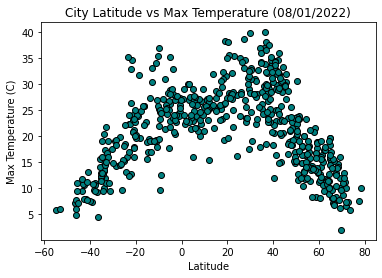

In [12]:
#creating and saving our figure
fig1 = plt.figure()
plt.scatter(cities_data["Lats"], cities_data["Max Temp"], marker="o", facecolors="teal", edgecolors="black")

plt.title("City Latitude vs Max Temperature (08/01/2022)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

plt.show()

#for all graphs open through jupyter notebook, 
#or make sure the photo viewer on your computer is set to light mode so you can see the axis labels
fig1.savefig("output_data/CityLatVsMaxTemp_08_01_2022.png", dpi = 150)

## Latitude vs. Humidity Plot

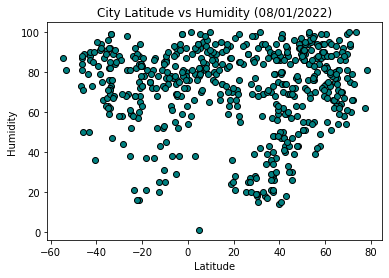

In [13]:
#creating and saving our figure
fig2 = plt.figure()
plt.scatter(cities_data["Lats"], cities_data["Humidity"], marker="o", facecolors="teal", edgecolors="black")

plt.title("City Latitude vs Humidity (08/01/2022)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

plt.show()

fig2.savefig("output_data/CityLatVsHumidity_08_01_2022.png", dpi = 150)

## Latitude vs. Cloudiness Plot

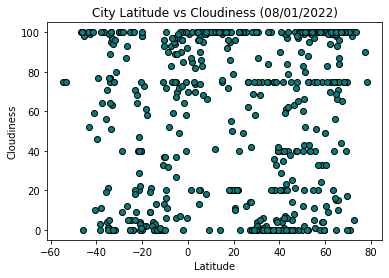

In [14]:
#creating and saving our figure
fig3 = plt.figure()
plt.scatter(cities_data["Lats"], cities_data["Cloudiness"], marker="o", facecolors="teal", edgecolors="black")

plt.title("City Latitude vs Cloudiness (08/01/2022)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

plt.show()

fig3.savefig("output_data/CityLatVsCloudiness_08_01_2022.png", dpi = 150)

## Latitude vs. Wind Speed Plot

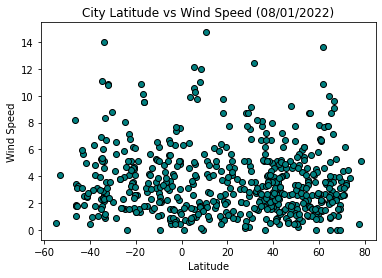

In [15]:
#creating and saving our figure
fig4 = plt.figure()
plt.scatter(cities_data["Lats"], cities_data["Wind Speed"], marker="o", facecolors="teal", edgecolors="black")

plt.title("City Latitude vs Wind Speed (08/01/2022)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

plt.show()

fig4.savefig("output_data/CityLatVsWindSpeed_08_01_2022.png", dpi = 150)

## Linear Regression

In [46]:
#filter by northern hemisphere 
north_hemi = cities_data.loc[cities_data["Lats"] >= 0]

#checking to make sure our lowest value is still greater than or equal to 0
#looking at the size of our data for Northern Hemisphere cities
#print(north_hemi["Lats"].min())
#north_hemi.shape

0.5333


(375, 9)

In [47]:
#filter by southern hemisphere
south_hemi = cities_data.loc[cities_data["Lats"] <= 0]

#checking to make sure our highest value is still less than or equal to 0
#looking at the size of our data for Northern Hemisphere cities
#print(south_hemi["Lats"].max())
#south_hemi.shape

-0.0921


(183, 9)

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [19]:
#getting regression values
N1_slope, N1_int, N1_r, N1_p, N1_std_err = linregress(north_hemi["Lats"], north_hemi["Max Temp"])

#creating our line equation
N1_fit = N1_slope * north_hemi["Lats"] + N1_int

#making our equation as a string so we can annotate our graph
N1_line = "y = " + str(round(N1_slope,2)) + "x + " + str(round(N1_int, 2))

The r value is  -0.6335629144146457


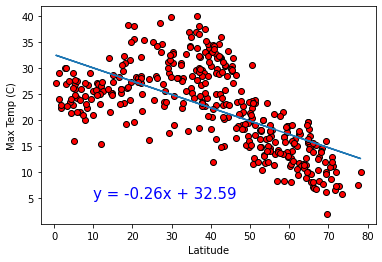

In [20]:
#printing our r value, plotting our regres line and annotating the equation into our graph
print("The r value is ", N1_r)
fig5 = plt.figure()
plt.plot(north_hemi["Lats"],N1_fit)
plt.annotate(N1_line,(10,5),fontsize=15,color="blue")

#creating scatter plot
plt.scatter(north_hemi["Lats"], north_hemi["Max Temp"], marker="o", facecolors="red", edgecolors="black")

#labeling our graph
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
fig5.savefig("output_data/regresNothern_MaxTempVLat_08_01_2022.png", dpi = 150)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [21]:
#getting regression values
S1_slope, S1_int, S1_r, S1_p, S1_std_err = linregress(south_hemi["Lats"], south_hemi["Max Temp"])

#creating our line equation
S1_fit = S1_slope * south_hemi["Lats"] + S1_int

#making our equation as a string so we can annotate our graph
S1_line = "y = " + str(round(S1_slope,2)) + "x + " + str(round(S1_int, 2))

The r value is  0.7914156426991196


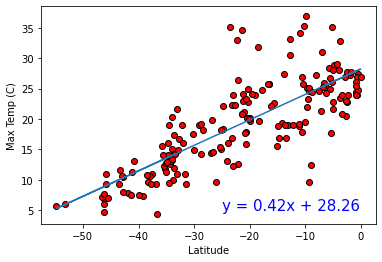

In [22]:
#printing our r value, plotting our regres line and annotating the equation into our graph
print("The r value is ", S1_r)
fig6 = plt.figure()
plt.plot(south_hemi["Lats"],S1_fit)
plt.annotate(S1_line,(-25,5),fontsize=15,color="blue")

plt.scatter(south_hemi["Lats"], south_hemi["Max Temp"], marker="o", facecolors="red", edgecolors="black")

#labeling our graph
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
fig6.savefig("output_data/regresSouthern_MaxTempVLat_08_01_2022.png", dpi = 150)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [23]:
#getting regression values
N2_slope, N2_int, N2_r, N2_p, N2_std_err = linregress(north_hemi["Lats"], north_hemi["Humidity"])

#creating our line equation
N2_fit = N2_slope * north_hemi["Lats"] + N2_int

#making our equation as a string so we can annotate our graph
N2_line = "y = " + str(round(N2_slope,2)) + "x + " + str(round(N2_int, 2))

The r value is  0.043934488748679904


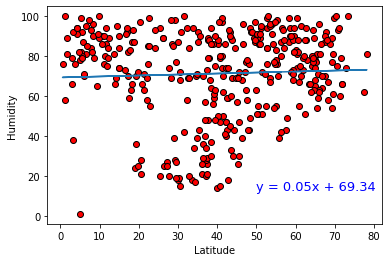

In [24]:
#printing our r value, plotting our regres line and annotating the equation into our graph
print("The r value is ", N2_r)
fig5 = plt.figure()
plt.plot(north_hemi["Lats"],N2_fit)
plt.annotate(N2_line,(50,13),fontsize=13,color="blue")

plt.scatter(north_hemi["Lats"], north_hemi["Humidity"], marker="o", facecolors="red", edgecolors="black")

#labeling our graph
plt.xlabel("Latitude")
plt.ylabel("Humidity")
fig5.savefig("output_data/regresNothern_HumidityVLat_08_01_2022.png", dpi = 150)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [25]:
#getting regression values
S2_slope, S2_int, S2_r, S2_p, S2_std_err = linregress(south_hemi["Lats"], south_hemi["Humidity"])

#creating our line equation
S2_fit = S2_slope * south_hemi["Lats"] + S2_int

#making our equation as a string so we can annotate our graph
S2_line = "y = " + str(round(S2_slope,2)) + "x + " + str(round(S2_int, 2))

The r value is  -0.13145963760192875


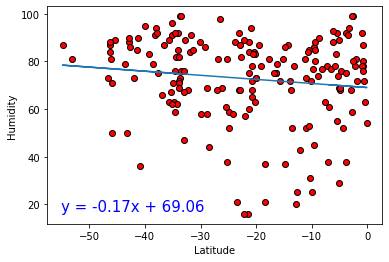

In [26]:
#printing our r value, plotting our regres line and annotating the equation into our graph
print("The r value is ", S2_r)
fig6 = plt.figure()
plt.plot(south_hemi["Lats"],S2_fit)
plt.annotate(S2_line,(-55,17),fontsize=15,color="blue")

plt.scatter(south_hemi["Lats"], south_hemi["Humidity"], marker="o", facecolors="red", edgecolors="black")

#labeling our graph
plt.xlabel("Latitude")
plt.ylabel("Humidity")
fig6.savefig("output_data/regresSouthern_HumidityVLat_08_01_2022.png", dpi = 150)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [27]:
#getting regression values
N3_slope, N3_int, N3_r, N3_p, N3_std_err = linregress(north_hemi["Lats"], north_hemi["Cloudiness"])

#creating our line equation
N3_fit = N3_slope * north_hemi["Lats"] + N3_int

#making our equation as a string so we can annotate our graph
N3_line = "y = " + str(round(N3_slope,2)) + "x + " + str(round(N3_int, 2))

The r value is  -0.020557641756683204


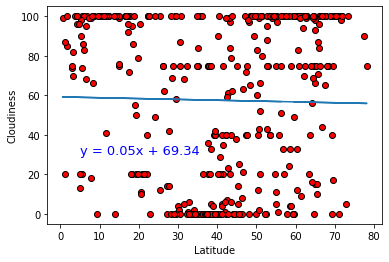

In [41]:
#printing our r value, plotting our regres line and annotating the equation into our graph
print("The r value is ", N3_r)
fig7 = plt.figure()
plt.plot(north_hemi["Lats"],N3_fit)
plt.annotate(N2_line,(5,30),fontsize=13,color="blue")

plt.scatter(north_hemi["Lats"], north_hemi["Cloudiness"], marker="o", facecolors="red", edgecolors="black")

#labeling our graph
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
fig7.savefig("output_data/regresNothern_CloudinessVLat_08_01_2022.png", dpi = 150)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [29]:
#getting regression values
S3_slope, S3_int, S3_r, S3_p, S3_std_err = linregress(south_hemi["Lats"], south_hemi["Cloudiness"])

#creating our line equation
S3_fit = S3_slope * south_hemi["Lats"] + S3_int

#making our equation as a string so we can annotate our graph
S3_line = "y = " + str(round(S3_slope,2)) + "x + " + str(round(S3_int, 2))

The r value is  -0.06324934026736564


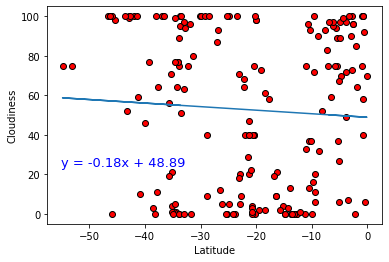

In [40]:
#printing our r value, plotting our regres line and annotating the equation into our graph
print("The r value is ", S3_r)
fig8 = plt.figure()
plt.plot(south_hemi["Lats"],S3_fit)
plt.annotate(S3_line,(-55,24),fontsize=13,color="blue")

plt.scatter(south_hemi["Lats"], south_hemi["Cloudiness"], marker="o", facecolors="red", edgecolors="black")

#labeling our graph
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
fig8.savefig("output_data/regresSouthern_CloudinessVLat_08_01_2022.png", dpi = 150)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [31]:
#getting regression values
N4_slope, N4_int, N4_r, N4_p, N4_std_err = linregress(north_hemi["Lats"], north_hemi["Wind Speed"])

#creating our line equation
N4_fit = N4_slope * north_hemi["Lats"] + N4_int

#making our equation as a string so we can annotate our graph
N4_line = "y = " + str(round(N4_slope,2)) + "x + " + str(round(N4_int, 2))

The r value is  -0.05589363552059825


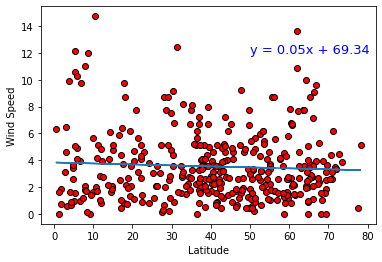

In [37]:
#printing our r value, plotting our regres line and annotating the equation into our graph
print("The r value is ", N4_r)
fig9 = plt.figure()
plt.plot(north_hemi["Lats"],N4_fit)
plt.annotate(N2_line,(50,12),fontsize=13,color="blue")

plt.scatter(north_hemi["Lats"], north_hemi["Wind Speed"], marker="o", facecolors="red", edgecolors="black")

#labeling our graph
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
fig9.savefig("output_data/regresNothern_WindSpeedVLat_08_01_2022.png", dpi = 150)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [33]:
#getting regression values
S4_slope, S4_int, S4_r, S4_p, S4_std_err = linregress(south_hemi["Lats"], south_hemi["Wind Speed"])

#creating our line equation
S4_fit = S4_slope * south_hemi["Lats"] + S4_int

#making our equation as a string so we can annotate our graph
S4_line = "y = " + str(round(S4_slope,2)) + "x + " + str(round(S4_int, 2))

The r value is  -0.042912697995733884


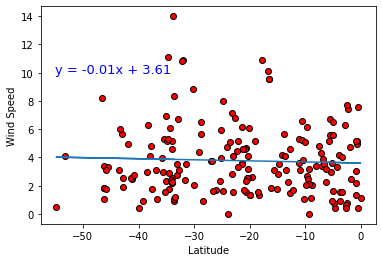

In [34]:
#printing our r value, plotting our regres line and annotating the equation into our graph
print("The r value is ", S4_r)
fig10 = plt.figure()
plt.plot(south_hemi["Lats"],S4_fit)
plt.annotate(S4_line,(-55,10),fontsize=13,color="blue")

plt.scatter(south_hemi["Lats"], south_hemi["Wind Speed"], marker="o", facecolors="red", edgecolors="black")

#labeling our graph
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
fig10.savefig("output_data/regresSouthern_WindSpeedVLat_08_01_2022.png", dpi = 150)

In [54]:
north_hemi["Wind Speed"].agg({"mean", "median", "std", "sem", "var"})

median    2.930000
var       6.586175
sem       0.132526
std       2.566354
mean      3.540827
Name: Wind Speed, dtype: float64

In [55]:
south_hemi["Wind Speed"].agg({"mean", "median", "std", "sem", "var"})

median    3.300000
var       6.029654
sem       0.181518
std       2.455535
mean      3.769945
Name: Wind Speed, dtype: float64